In [0]:
!pip install utm
import pandas as pd
import numpy as np
import utm
import random
crimeData = pd.read_csv("test.csv")

  Created wheel for utm: filename=utm-0.5.0-cp36-none-any.whl size=5903 sha256=b42f218612d313349831c27d0c68194e63e98e96337a747c59865647468e2b9b
  Stored in directory: /root/.cache/pip/wheels/22/85/c2/314ffed39b8e02ca623e9b7d2ad7fcf3f8544a0e77c096be76
Successfully built utm


In [0]:
cd.head()

,id,month,year,time,Borough,dayPart,lat,lng,key
1,297648,1,2015,5.0,BROOKLYN,22-06,40.62210,-74.04026,PETIT_LARCENY
5,304674,1,2015,21.0,BROOKLYN,17-22,40.61949,-74.03905,PETIT_LARCENY
6,305791,1,2015,21.5,BROOKLYN,17-22,40.61719,-74.03877,PETIT_LARCENY
7,296560,1,2015,17.5,BROOKLYN,17-22,40.61451,-74.03739,PETIT_LARCENY
8,297171,1,2015,20.0,BROOKLYN,17-22,40.62729,-74.03686,PETIT_LARCENY


In [0]:
cd=crimeData.query('(key == "GRAND_LARCENY" | key == "PETIT_LARCENY") & year==2015')

In [0]:
crimeData['Latitude'][0]

40.82884833

In [0]:
crimeData['Longitude'][0]

-73.91666114

In [0]:
utm.from_latlon(40.82884833, -73.91666114)

(591346.5311014517, 4520322.53389688, 18, 'T')

In [0]:
cd=cd.dropna()

In [0]:
cd['xcoorinate']=cd.apply(lambda x: utm.from_latlon(x['lat'], x['lng'])[0], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
cd['ycoorinate']=cd.apply(lambda x: utm.from_latlon(x['lat'], x['lng'])[1], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
cd.head()

,id,month,year,time,Borough,dayPart,lat,lng,key,xcoorinate,ycoorinate
1,297648,1,2015,5.0,BROOKLYN,22-06,40.62210,-74.04026,PETIT_LARCENY,581175.432813,4.497251e+06
5,304674,1,2015,21.0,BROOKLYN,17-22,40.61949,-74.03905,PETIT_LARCENY,581280.940722,4.496962e+06
6,305791,1,2015,21.5,BROOKLYN,17-22,40.61719,-74.03877,PETIT_LARCENY,581307.413301,4.496707e+06
7,296560,1,2015,17.5,BROOKLYN,17-22,40.61451,-74.03739,PETIT_LARCENY,581427.398822,4.496411e+06
8,297171,1,2015,20.0,BROOKLYN,17-22,40.62729,-74.03686,PETIT_LARCENY,581456.705034,4.497830e+06


In [0]:
type(cd.apply(lambda x: utm.from_latlon(x['Latitude'], x['Longitude'])[1], axis=1))

pandas.core.series.Series

In [0]:
cd['yoorinate']=cd.apply(lambda x: utm.from_latlon(x['Latitude'], x['Longitude'])[1], axis=1)

In [0]:
cd['yoorinate']

46        4.507316e+06
72        4.511531e+06
193       4.506205e+06
275       4.506254e+06
348       4.509374e+06
              ...     
478207    4.510306e+06
478208    4.510384e+06
478246    4.512155e+06
478260    4.505658e+06
478296    4.512911e+06
Name: yoorinate, Length: 11236, dtype: float64

In [0]:
cd.head()

,day,month,year,time,Borough,dayPart,Latitude,Longitude,offenseDescription,pdDescription,crimeCompleted,offenseLevel,occurenceLocation,premiseDescription,xoorinate,yoorinate
46,31.0,12.0,2015.0,22.17,QUEENS,22-06,40.711079,-73.854720,BURGLARY,BURGLARY_COMMERCIAL_NIGHT,COMPLETED,FELONY,REAR_OF,FAST_FOOD,596740.134666,4.507316e+06
72,31.0,12.0,2015.0,21.50,QUEENS,17-22,40.749286,-73.878540,GRAND_LARCENY,LARCENY_GRAND_FROM_RESIDENCE_UNATTENDED,COMPLETED,FELONY,INSIDE,RESIDENCE_APT_HOUSE,594673.886869,4.511531e+06
193,31.0,12.0,2015.0,17.83,QUEENS,17-22,40.700407,-73.789188,GRAND_LARCENY,LARCENY_GRAND_BY_EXTORTION,COMPLETED,FELONY,FRONT_OF,STREET,602291.958846,4.506205e+06
275,31.0,12.0,2015.0,15.50,QUEENS,12-17,40.701100,-73.813793,GRAND_LARCENY,LARCENY_GRAND_FROM_VEHICLE_MOTORCYCLE,COMPLETED,FELONY,FRONT_OF,STREET,600212.183158,4.506254e+06
348,31.0,12.0,2015.0,13.50,QUEENS,12-17,40.729716,-73.863967,BURGLARY,BURGLARY_RESIDENCE_DAY,COMPLETED,FELONY,INSIDE,RESIDENCE_APT_HOUSE,595932.314003,4.509374e+06


In [0]:
cd.to_csv('file_name.csv', index=False)

In [0]:
cd=cd.drop_duplicates(['xcoorinate','ycoorinate'],keep= 'last')

In [0]:
cd.to_csv('q.csv', index=False)

In [0]:
cd.shape

(7521, 16)

In [0]:
print(min(cd['xoorinate']))
print(max(cd['xoorinate']))
print(min(cd['yoorinate']))
print(max(cd['yoorinate']))

587939.5209545706
609655.6862189085
4489788.072546474
4516968.638906053


In [0]:
crimeData.offenseDescription.unique()

array(['FORGERY', 'MURDER_AND_NON_NEGL_MANSLAUGHTER', 'DANGEROUS_DRUGS',
       'ASSAULT_AND_RELATED_OFFENSES', 'FELONY_ASSAULT',
       'DANGEROUS_WEAPONS', 'PETIT_LARCENY', 'GRAND_LARCENY', 'ROBBERY',
       'OFFENSES_AGAINST_PUBLIC_ADMINI',
       'CRIMINAL_MISCHIEF_AND_RELATED_OF', 'RAPE',
       'INTOXICATED_AND_IMPAIRED_DRIVING', 'HARRASSMENT_', 'SEX_CRIMES',
       'BURGLARY', 'CRIMINAL_TRESPASS', 'MISCELLANEOUS_PENAL_LAW',
       'VEHICLE_AND_TRAFFIC_LAWS', 'OFF_AGNST_PUB_ORD_SENSBLTY_AND',
       'FRAUDS', 'GRAND_LARCENY_OF_MOTOR_VEHICLE',
       'OFFENSES_INVOLVING_FRAUD', 'OFFENSES_AGAINST_THE_PERSON',
       'FRAUDULENT_ACCOSTING', 'OTHER_OFFENSES_RELATED_TO_THEF',
       'GAMBLING', 'ARSON', 'POSSESSION_OF_STOLEN_PROPERTY',
       'UNAUTHORIZED_USE_OF_A_VEHICLE', 'THEFT_FRAUD',
       'DISORDERLY_CONDUCT', 'MISSING_VALUE', 'ADMINISTRATIVE_CODE',
       'CHILD_ABANDONMENT_NON_SUPPORT', 'OTHER_STATE_LAWS_(NON_PENAL_LA',
       'NYS_LAWS_UNCLASSIFIED_FELONY', 'BURGLARS_TOOLS'

In [0]:
cd.head()

,day,month,year,time,Borough,dayPart,Latitude,Longitude,offenseDescription,pdDescription,crimeCompleted,offenseLevel,occurenceLocation,premiseDescription,xoorinate,yoorinate
46,31.0,12.0,2015.0,22.17,QUEENS,22-06,40.711079,-73.854720,BURGLARY,BURGLARY_COMMERCIAL_NIGHT,COMPLETED,FELONY,REAR_OF,FAST_FOOD,596740.134666,4.507316e+06
72,31.0,12.0,2015.0,21.50,QUEENS,17-22,40.749286,-73.878540,GRAND_LARCENY,LARCENY_GRAND_FROM_RESIDENCE_UNATTENDED,COMPLETED,FELONY,INSIDE,RESIDENCE_APT_HOUSE,594673.886869,4.511531e+06
193,31.0,12.0,2015.0,17.83,QUEENS,17-22,40.700407,-73.789188,GRAND_LARCENY,LARCENY_GRAND_BY_EXTORTION,COMPLETED,FELONY,FRONT_OF,STREET,602291.958846,4.506205e+06
275,31.0,12.0,2015.0,15.50,QUEENS,12-17,40.701100,-73.813793,GRAND_LARCENY,LARCENY_GRAND_FROM_VEHICLE_MOTORCYCLE,COMPLETED,FELONY,FRONT_OF,STREET,600212.183158,4.506254e+06
348,31.0,12.0,2015.0,13.50,QUEENS,12-17,40.729716,-73.863967,BURGLARY,BURGLARY_RESIDENCE_DAY,COMPLETED,FELONY,INSIDE,RESIDENCE_APT_HOUSE,595932.314003,4.509374e+06


In [0]:
q=[];
ctr=0;
for index,a in cd.iterrows():
  q=[];
  print(len(q));
  key=str(a['lat'])+"#"+str(a['lng']);
  if key in dic.keys():
    continue;
  q.append(a)
  li=[];
  dic={};
  
  dic[key]=1;
  pts=[];
  while len(q)>0:
    print(len(q));
    front=q.pop(0);
    for ind,b in cd.iterrows():
      key=str(b['lat'])+"#"+str(b['lng']);
      if key in dic.keys():
        continue;
      elif GetDistance(front['lat'],front['lng'],b['lat'],b['lng'])<0.1:
        dic[key]=1;
        q.append(b);
        pts.append([b['xcoorinate'],b['ycoorinate']]);
  break
  #print(pts)    
  li.append(pts);  

0


NameError: ignored

In [0]:
import math
def GetDistance( longitude,  latitude,  otherLongitude,  otherLatitude):

    d1 = latitude * (math.pi / 180.0);
    num1 = longitude * (math.pi / 180.0);
    d2 = otherLatitude * (math.pi / 180.0);
    num2 = otherLongitude * (math.pi / 180.0) - num1;
    d3 = math.pow(math.sin((d2 - d1) / 2.0), 2.0) + math.cos(d1) * math.cos(d2) * math.pow(math.sin(num2 / 2.0), 2.0);

    return 0.000621371*6376500.0 * (2.0 * math.atan2(math.sqrt(d3), math.sqrt(1.0 - d3)));


In [0]:
print(li[0])

[[596740.1346657374, 4507315.531056722], [595932.3140034189, 4509374.261103754], [596210.2533716972, 4512502.780239043], [597477.3920438972, 4508511.169292465], [595902.9816405964, 4504427.1867866665], [597540.1991477896, 4503982.002728621], [597587.9760016666, 4508648.035166165], [596721.2364814582, 4510340.719658359], [596035.5697413692, 4511759.980846523], [597633.4536790815, 4505562.197814158], [597508.412470272, 4505115.558188233], [597214.8950127525, 4509565.610227197], [596433.9824972337, 4511133.719250042], [596750.9778413365, 4507781.89804725], [596065.5221699136, 4504390.030296113], [597273.0211243886, 4508689.245004361], [596545.5641619603, 4510246.3849554015], [596318.2271288768, 4507837.919147145], [597246.4883466788, 4503870.177476658], [596958.8659525986, 4507990.874919381], [597320.4809034466, 4505161.263172733], [596745.9808431157, 4502622.390301251], [596893.177062398, 4508327.162517891], [597704.723999105, 4508270.273809779], [597351.9692627504, 4503276.839924177], [

In [0]:
ctr=0;
li=[];
dic={};
for index,a in cd.iterrows():
  key=str(a['lat'])+"#"+str(a['lng']);
  pts=[]
  if key in dic.keys():
      continue;
  for ind,b in cd.iterrows():
    key=str(b['lat'])+"#"+str(b['lng']);
    if key in dic.keys():
        continue;
    elif GetDistance(a['lat'],a['lng'],b['lat'],b['lng'])<0.1:
        dic[key]=1;
        pts.append([b['xcoorinate'],b['ycoorinate']]);
    
  print(index)    
  li.append(pts);  

1
6
7
8
11
15
21
34
38
51
60
65
67
79
94
97
105
106
112
131
133
137
148
170
183
186
192
197
210
228
233
239
246
247
259
265
270
280
286
288
290
292
295
301
304
332
361
368
382
406
410
412
415
441
469
472
476
486
493
506
513
525
533
539
540
541
555
587
592
596
618
621
626
628
632
651
658
679
692
703
707
709
718
723
731
744
784
788
799
811
820
828
829
833
835
857
861
865
872
879
891
911
930
933
938
942
951
952
957
960
968
985
989
996
1004
1009
1019
1024
1041
1052
1057
1064
1073
1076
1091
1109
1110
1117
1118
1130
1141
1145
1152
1156
1159
1167
1181
1205
1221
1240
1244
1245
1250
1255
1261
1263
1268
1284
1314
1318
1380
1394
1405
1407
1422
1428
1431
1455
1474
1489
1525
1529
1533
1552
1562
1589
1662
1674
1678
1685
1689
1691
1701
1731
1737
1774
1779
1786
1811
1821
1855
1864
1867
1870
1879
1881
1896
1912
1934
1938
1943
1948
1951
1957
1958
1959
1978
2003
2006
2037
2083
2090
2092
2114
2124
2125
2131
2151
2159
2182
2192
2194
2203
2211
2216
2218
2220
2230
2250
2251
2267
2292
2305
2306
2319
2340
2345

In [0]:
len(li)

1217

In [0]:
li

[[[581175.4328134238, 4497250.618961055],
  [581280.940721778, 4496962.013962911]],
 [[581307.4133009217, 4496706.962200748]],
 [[581427.3988223418, 4496410.746090752],
  [581490.778744192, 4496262.67579546]],
 [[581456.7050342493, 4497829.875275946]],
 [[581620.4987212162, 4496546.0820735125],
  [581666.3055793764, 4496457.770162165],
  [581733.220428356, 4496681.650486033]],
 [[581694.9498998687, 4498626.267014738],
  [581758.4144416127, 4498931.154349419]],
 [[581748.8829594123, 4496410.938806329],
  [581779.7528709152, 4496835.366311897]],
 [[581946.9915303037, 4496551.8893081965]],
 [[581997.161221243, 4497143.057749496]],
 [[582180.9203913885, 4499193.37305654]],
 [[582273.2444686277, 4497268.224469974]],
 [[582297.762157018, 4498569.630632867]],
 [[582382.174824194, 4497591.3824879965]],
 [[582561.2295432151, 4498606.965591255]],
 [[582691.6630556536, 4499351.129323982],
  [582763.6383135504, 4499038.856980325]],
 [[582757.0692981409, 4496891.685333559]],
 [[582827.1778300424, 4

In [0]:
class Point: 
  def __init__(self,X,Y):
    self.X=X 
    self.Y=Y



class Circle:  
  def __init__(self,C=None,R=None):
	  self.C=C; 
	  self.R=R; 



In [0]:
def dist(a,b): 

	return math.sqrt(math.pow(a.X - b.X, 2) 
				+ math.pow(a.Y - b.Y, 2)); 
 

In [0]:
def is_inside( c,  p): 
	return dist(c.C, p) <= c.R; 


In [0]:
def get_circle_center( bx, by,  cx,  cy): 
  B = bx * bx + by * by; 
  C = cx * cx + cy * cy; 
  D = bx * cy - by * cx; 
  return [ (cy * B - by * C) / (2 * D),(bx * C - cx * B) / (2 * D) ]; 

In [0]:
def circle_from(A,B,C): 
 
  I = get_circle_center(B.X - A.X, B.Y - A.Y, C.X - A.X, C.Y - A.Y); 
  I.X += A.X; 
  I.Y += A.Y; 
  return [ I, dist(I, A) ]; 
 

In [0]:
def circle_from( A, B): 
	C = [ (A.X + B.X) / 2.0, (A.Y + B.Y) / 2.0 ]; 
	return [ C, dist(A, B) / 2.0 ]; 

In [0]:
def is_valid_circle( c,P): 
	for p in P: 
	  if not is_inside(c, p):
		  return false; 
	return true; 

In [0]:
def min_circle_trivial( P):  
	if len(P)==0:
		return [ [ 0, 0 ], 0 ]; 
	 
	elif len(P)==1:
		return [ P[0], 0 ];  
	elif len(P) == 2: 
		return circle_from(P[0], P[1]); 

	for i in range(3): 
		for j in range(i+1,3): 
			c = circle_from(P[i], P[j]); 
			if (is_valid_circle(c, P)): 
				return c;  

	return circle_from(P[0], P[1], P[2]);  

In [0]:
def welzl_helper( P, R, n):  
	if (n == 0 or len(R) == 3): 
		return min_circle_trivial(R); 

	idx = random.randint(0,n-1) ; 
	p = Point(P[idx][0],P[idx][1]); 

	(P[idx], P[n - 1])=( P[n - 1],P[idx])

	d = welzl_helper(P, R, n - 1); 

	if (is_inside(d, p)): 
		return d;  
	R.append(p); 
	return welzl_helper(P, R, n - 1); 


In [0]:
def welzl( P) :

	P_copy = P; 
	random.shuffle(P_copy) 
	return welzl_helper(P_copy, [], len(P_copy)); 
 

In [0]:
final_coordinates=[];
for a in li:
 c,r=welzl( a)
 print(c)
 break;


AttributeError: ignored

In [0]:
print(li)

[[[581175.4328134238, 4497250.618961055], [581280.940721778, 4496962.013962911]], [[581307.4133009217, 4496706.962200748]], [[581427.3988223418, 4496410.746090752], [581490.778744192, 4496262.67579546]], [[581456.7050342493, 4497829.875275946]], [[581620.4987212162, 4496546.0820735125], [581666.3055793764, 4496457.770162165], [581733.220428356, 4496681.650486033]], [[581694.9498998687, 4498626.267014738], [581758.4144416127, 4498931.154349419]], [[581748.8829594123, 4496410.938806329], [581779.7528709152, 4496835.366311897]], [[581946.9915303037, 4496551.8893081965]], [[581997.161221243, 4497143.057749496]], [[582180.9203913885, 4499193.37305654]], [[582273.2444686277, 4497268.224469974]], [[582297.762157018, 4498569.630632867]], [[582382.174824194, 4497591.3824879965]], [[582561.2295432151, 4498606.965591255]], [[582691.6630556536, 4499351.129323982], [582763.6383135504, 4499038.856980325]], [[582757.0692981409, 4496891.685333559]], [[582827.1778300424, 4500092.022942333], [582921.012

In [0]:
cd.head()

,day,month,year,time,Borough,dayPart,Latitude,Longitude,offenseDescription,pdDescription,crimeCompleted,offenseLevel,occurenceLocation,premiseDescription,xoorinate,yoorinate
46,31.0,12.0,2015.0,22.17,QUEENS,22-06,40.711079,-73.854720,BURGLARY,BURGLARY_COMMERCIAL_NIGHT,COMPLETED,FELONY,REAR_OF,FAST_FOOD,596740.134666,4.507316e+06
72,31.0,12.0,2015.0,21.50,QUEENS,17-22,40.749286,-73.878540,GRAND_LARCENY,LARCENY_GRAND_FROM_RESIDENCE_UNATTENDED,COMPLETED,FELONY,INSIDE,RESIDENCE_APT_HOUSE,594673.886869,4.511531e+06
193,31.0,12.0,2015.0,17.83,QUEENS,17-22,40.700407,-73.789188,GRAND_LARCENY,LARCENY_GRAND_BY_EXTORTION,COMPLETED,FELONY,FRONT_OF,STREET,602291.958846,4.506205e+06
275,31.0,12.0,2015.0,15.50,QUEENS,12-17,40.701100,-73.813793,GRAND_LARCENY,LARCENY_GRAND_FROM_VEHICLE_MOTORCYCLE,COMPLETED,FELONY,FRONT_OF,STREET,600212.183158,4.506254e+06
348,31.0,12.0,2015.0,13.50,QUEENS,12-17,40.729716,-73.863967,BURGLARY,BURGLARY_RESIDENCE_DAY,COMPLETED,FELONY,INSIDE,RESIDENCE_APT_HOUSE,595932.314003,4.509374e+06


In [0]:
cd_gl=cd.query('offenseDescription == "GRAND_LARCENY" ')
cd_gl=cd_gl.drop_duplicates(['xoorinate','yoorinate'],keep= 'last')
cd_gl.to_csv('qgl.csv', index=False)
print(min(cd_gl['xoorinate']))
print(max(cd_gl['xoorinate']))
print(min(cd_gl['yoorinate']))
print(max(cd_gl['yoorinate']))

587939.5209545706
609655.6862189085
4489788.072546474
4516880.53152722


In [0]:
cd_B=cd.query('offenseDescription == "BURGLARY" ')
cd_B=cd_B.drop_duplicates(['xoorinate','yoorinate'],keep= 'last')
cd_B.to_csv('qB.csv', index=False)
print(min(cd_B['xoorinate']))
print(max(cd_B['xoorinate']))
print(min(cd_B['yoorinate']))
print(max(cd_B['yoorinate']))

588136.8208229165
609609.3348224611
4490471.510420359
4516968.638906053


In [0]:
from sklearn.cluster import DBSCAN

In [0]:
crimeData = pd.read_csv("nycjan2015.csv")

In [0]:
crimeData.head()

,X,Y
0,581228.1868,4497106.316
1,581307.4133,4496706.962
2,581459.0888,4496336.711
3,581456.7050,4497829.875
4,581699.7630,4496569.710


In [0]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [0]:
X = np.array(crimeData.to_numpy())
db = DBSCAN(eps=0.0095, min_samples=30).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [0]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f"
#      % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f"
 #     % metrics.adjusted_mutual_info_score(labels_true, labels))
#print("Silhouette Coefficient: %0.3f"
  #    % metrics.silhouette_score(X, labels))

Estimated number of clusters: 0
Estimated number of noise points: 1217


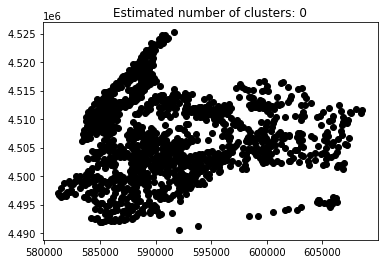

In [0]:
# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [0]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
#weather_df_clus_temp = np.array(crimeData.to_numpy())
#weather_df_clus_temp = DBSCAN(eps=2, min_samples=2).fit(X)
weather_df=crimeData;
weather_df_clus_temp = weather_df
weather_df_clus_temp = StandardScaler().fit_transform(weather_df_clus_temp)

db = DBSCAN(eps=500, min_samples=10,metric='precomputed').fit(weather_df_clus_temp)
labels = db.labels_
print (labels)
weather_df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

ValueError: ignored

In [0]:

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
#my_map.drawmapboundary()
#my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
#my_map.shadedrelief()
#my_map.bluemarble()
#my_map.shadedrelief()
my_map.etopo()

# To create a color map
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization1
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = weather_df[weather_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number)+', Average Mean Temp: '+ str(np.mean(clust_set.Tm)))
plt.title(r"Weather Stations in Canada Clustered (1): $ \epsilon = 0.3$", fontsize=14)        
plt.savefig("etopo_cluster.png", dpi=300)

ModuleNotFoundError: ignored

In [0]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from mpl_toolkits.mplot2d import Axes2D
from sklearn.cluster import DBSCAN

data = crimeData
fig = plt.figure()
ax = Axes2D(fig)
ax.scatter(data[:,0], data[:,1],  s=300)
ax.view_init(azim=200)
plt.show()

model = DBSCAN(eps=2.5, min_samples=100)
model.fit_predict(data)
pred = model.fit_predict(data)

fig = plt.figure()
ax = Axes2D(fig)
ax.scatter(data[:,0], data[:,1], c=model.labels_, s=300)
ax.view_init(azim=200)
plt.show()

print("number of cluster found: {}".format(len(set(model.labels_))))
print('cluster for each point: ', model.labels_)

ModuleNotFoundError: ignored

In [0]:
from math import radians, cos, sin, asin, sqrt

from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt
import pandas as pd
from pyproj import Proj, transform
import warnings
warnings.filterwarnings('ignore')
dictll={};
def compute(lonlat):
  lat1, lon1 = lonlat
  key=str(lat1)+"#"+str(lon1)
  #print(lonlat)
  if key in dictll.keys():
    return dictll[key];
  
  inProj = Proj(init='epsg:3857')
  outProj = Proj(init='epsg:4326')
  #x1,y1 = -11705274.6374,4826473.6922
  lat1,lon1 = transform(inProj,outProj,lat1,lon1)
  dictll[key]=[lat1,lon1]
  return lat1,lon1
def haversine(lonlat1, lonlat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    
    #print x2,y2
    # convert decimal degrees to radians 
    lat1, lon1 = compute(lonlat1)
    lat2, lon2 = compute(lonlat2)
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    #print(c*r)
    return c * r


X = pd.read_csv('nycjan2015.csv')
#X=X[:100]
distance_matrix = squareform(pdist(X, (lambda u,v: haversine(u,v))))
print('done')


done


In [0]:
print(distance_matrix)

[[ 0.          0.32529859  0.65034004 ... 29.14782695 29.34049459
  29.66910425]
 [ 0.32529859  0.          0.32944606 ... 29.20220552 29.38693241
  29.72017903]
 [ 0.65034004  0.32944606  0.         ... 29.18473985 29.36132481
  29.69926645]
 ...
 [29.14782695 29.20220552 29.18473985 ...  0.          0.74742714
   0.6014902 ]
 [29.34049459 29.38693241 29.36132481 ...  0.74742714  0.
   0.53921904]
 [29.66910425 29.72017903 29.69926645 ...  0.6014902   0.53921904
   0.        ]]


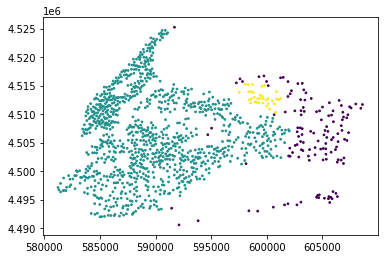

In [0]:
db = DBSCAN(eps=1.5, min_samples=20, metric='precomputed',n_jobs=-1)  # using "precomputed" as recommended by @Anony-Mousse
y_db = db.fit_predict(distance_matrix)

X['cluster'] = y_db

plt.scatter(X['X'], X['Y'], c=X['cluster'],s=3)
plt.show()

In [0]:
import num
print(np.unique(db.labels_))

[-1  0  1]


In [0]:
pip install pyproj

     |████████████████████████████████| 10.9MB 3.4MB/s 
